# 1. Funções de Pertinência para Lógica Fuzzy

## 1.1. Implementac¸ao de Funcões de Pertinência

In [1753]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Cria o diretório para salvar os gráficos, se não existir
output_dir = 'relatorio/img'
os.makedirs(output_dir, exist_ok=True)

### Plot 

In [1754]:
def plot_results(x, y, params, type):
    """
    Plota uma função de pertinência com base nos parâmetros fornecidos.

    :param x: Valores do domínio.
    :param y: Valores do grau de pertinência.
    :param params: Lista de parâmetros (ex.: [a, b, c]).
    :param type: Tipo da função (usado para salvar o gráfico).
    """
    # Plotando a função
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f"{type.capitalize()} {tuple(params)}")
    plt.title(f"Função {type.capitalize()}")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")

    # Adicionando linhas verticais para cada parâmetro
    colors = ['red', 'green', 'blue', 'orange', 'purple']  # Cores para os parâmetros
    for i, param in enumerate(params):
        plt.axvline(param, color=colors[i % len(colors)], linestyle='--', label=f"param[{i}]={param}")

    plt.legend()
    plt.grid()
    plt.savefig(f'{output_dir}/{type}.png')
    plt.show()

### 1. Função Triangular

In [1755]:
def triangular(x, a, b, c):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    else:
        return 0

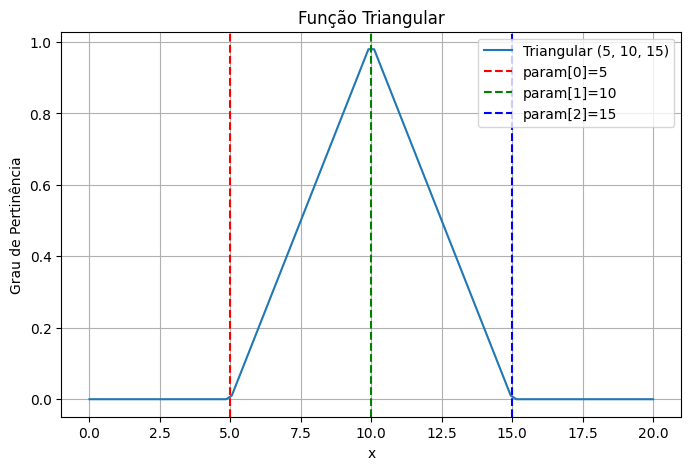

In [1756]:
# Exemplo de plotagem para a função triangular
a, b, c = 5, 10, 15  # Parâmetros da função triangular
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [triangular(val, a, b, c) for val in x]

# Plotando a função triangular
plot_results(x, y, [a, b, c], "triangular")

### 2. Função Trapezoidal

In [1757]:
def trapezoidal(x, a, b, c, d):
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)
    else:
        return 0

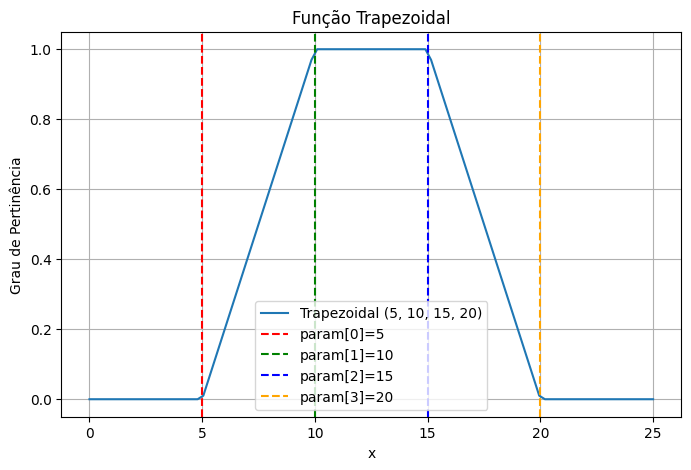

In [1758]:
# Exemplo de plotagem para a função trapezoidal
a, b, c, d = 5, 10, 15, 20  # Parâmetros da função trapezoidal
x = np.linspace(0, 25, 100)  # Valores de x no intervalo [0, 25]

# Calcula os graus de pertinência
y = [trapezoidal(val, a, b, c, d) for val in x]

# Plotando a função trapezoidal
plot_results(x, y, [a, b, c, d], "trapezoidal")

### 3. Função Gaussiana

In [1759]:
def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

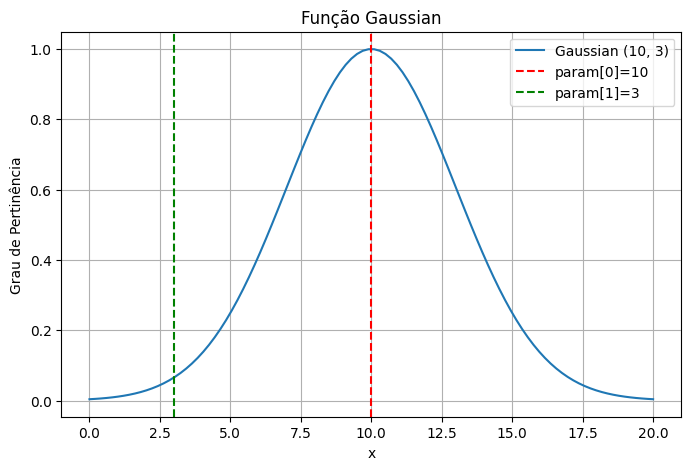

In [1760]:
# Exemplo de uso
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]
c = 10  # Centro da curva (onde a pertinência é máxima)
sigma = 3  # Largura da curva

# Calcula os graus de pertinência
y = [gaussian(val, c, sigma) for val in x]

# Plotando a função gaussiana
plot_results(x, y, [c, sigma], "gaussian")

### 4. Função Sigmoidal

In [1761]:
def sigmoidal(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

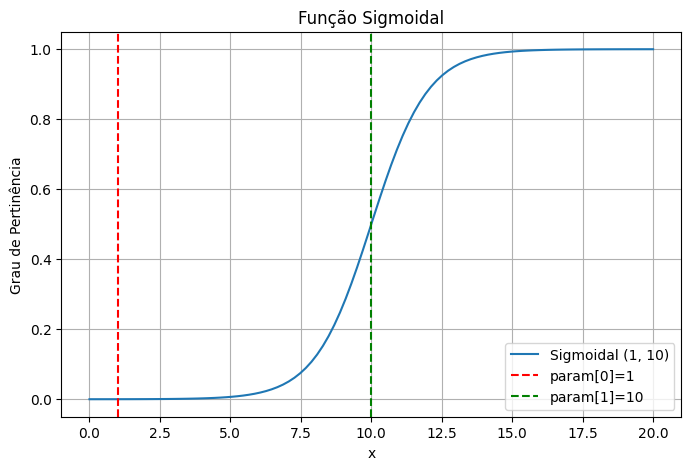

In [1762]:
# Exemplo de plotagem para a função sigmoidal
a, c = 1, 10  # Parâmetros da função sigmoidal
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [sigmoidal(val, a, c) for val in x]

# Plotando a função sigmoidal
plot_results(x, y, [a, c], "sigmoidal")

### 5. Função Sinoidal (Bell)

In [1763]:
def bell_function(x, a, b, c):
    """
    Função de pertinência em forma de sino.
    :param x: Valor de entrada.
    :param a: Controla a largura do sino.
    :param b: Controla a inclinação.
    :param c: Centro do sino.
    :return: Grau de pertinência.
    """
    return 1 / (1 + abs((x - c) / a) ** (2 * b))

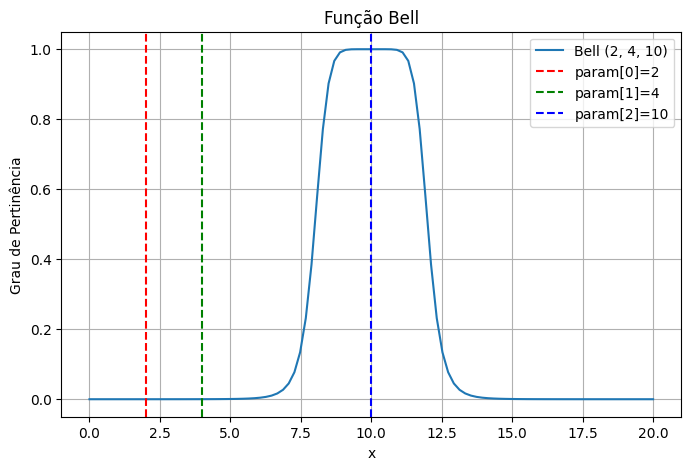

In [1764]:
# Exemplo de plotagem para a função Bell
a, b, c = 2, 4, 10  # Parâmetros da função Bell
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [bell_function(val, a, b, c) for val in x]

# Plotando a função Bell
plot_results(x, y, [a, b, c], "bell")

### 6. Função S

In [1765]:
def s_function(x, a, b):
    if x <= a:
        return 0
    elif a < x < b:
        return 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 1

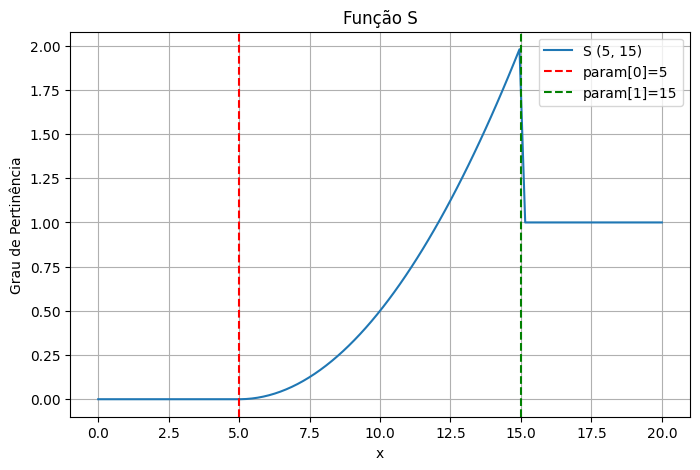

In [1766]:
# Exemplo de plotagem para a função S
a, b = 5, 15  # Parâmetros da função S
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [s_function(val, a, b) for val in x]

# Plotando a função S
plot_results(x, y, [a, b], "s")

### 7. Função Z

In [1767]:
def z_function(x, a, b):
    if x <= a:
        return 1
    elif a < x < b:
        return 1 - 2 * ((x - a) / (b - a)) ** 2
    elif x >= b:
        return 0

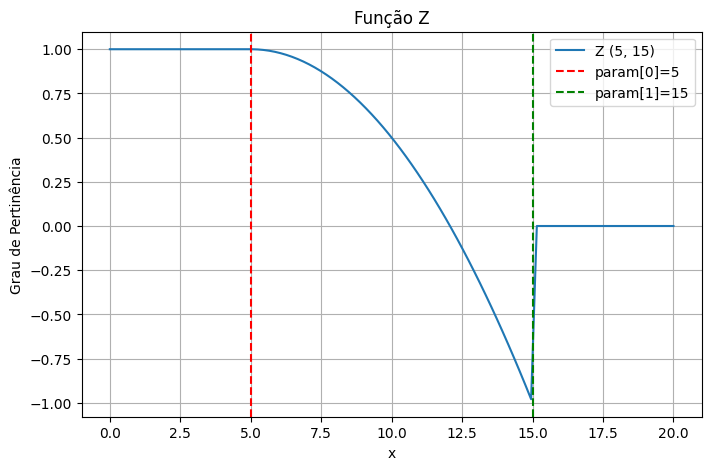

In [1768]:
# Exemplo de plotagem para a função Z
a, b = 5, 15  # Parâmetros da função Z
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [z_function(val, a, b) for val in x]

# Plotando a função Z
plot_results(x, y, [a, b], "z")

### 8. Função Cauchy

In [1769]:
def cauchy_function(x, c, gamma):
    """
    Função de pertinência Cauchy.
    :param x: Valor de entrada.
    :param c: Centro da função.
    :param gamma: Largura da função.
    :return: Grau de pertinência.
    """
    return 1 / (1 + ((x - c) / gamma) ** 2)

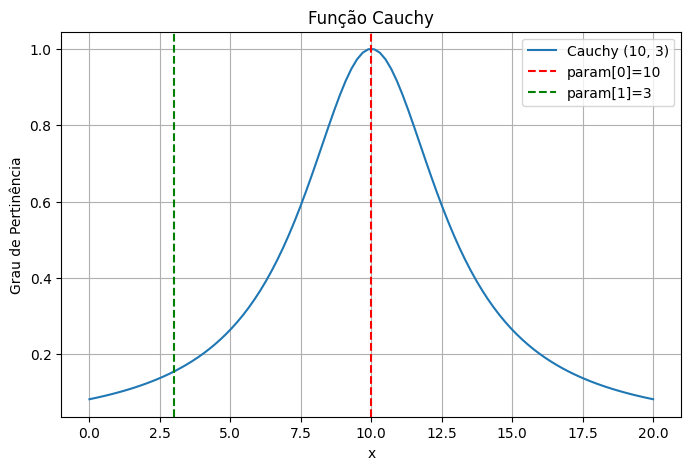

In [1770]:
# Exemplo de plotagem para a função Cauchy
c, gamma = 10, 3  # Parâmetros da função Cauchy
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [cauchy_function(val, c, gamma) for val in x]

# Plotando a função Cauchy
plot_results(x, y, [c, gamma], "cauchy")

### 9. Função Gaussiana Dupla

In [1771]:
def double_gaussian(x, c1, sigma1, c2, sigma2):
    """
    Função de pertinência Gaussiana Dupla.
    :param x: Valor de entrada.
    :param c1: Centro da primeira gaussiana.
    :param sigma1: Largura da primeira gaussiana.
    :param c2: Centro da segunda gaussiana.
    :param sigma2: Largura da segunda gaussiana.
    :return: Grau de pertinência combinado.
    """
    return np.maximum(
        np.exp(-0.5 * ((x - c1) / sigma1) ** 2),
        np.exp(-0.5 * ((x - c2) / sigma2) ** 2)
    )

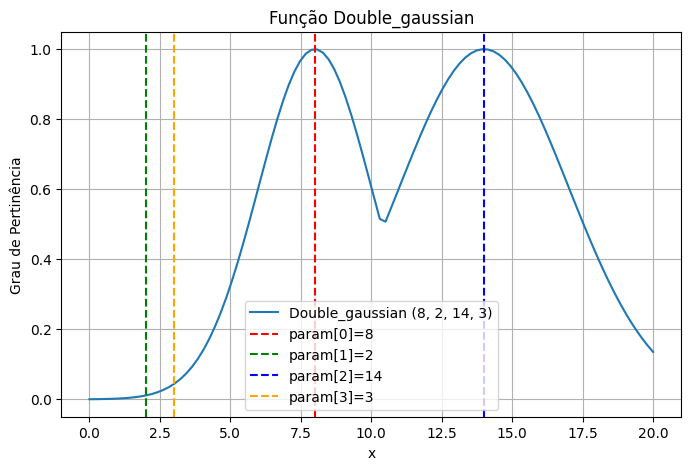

In [1772]:
# Exemplo de plotagem para a função Gaussiana Dupla
c1, sigma1 = 8, 2  # Parâmetros da primeira gaussiana
c2, sigma2 = 14, 3  # Parâmetros da segunda gaussiana
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [double_gaussian(val, c1, sigma1, c2, sigma2) for val in x]

# Plotando a função Gaussiana Dupla
plot_results(x, y, [c1, sigma1, c2, sigma2], "double_gaussian")

### 10. Função Retangular

In [1773]:
def rectangular_function(x, a, b):
    """
    Função de pertinência retangular.
    :param x: Valor de entrada.
    :param a: Início do intervalo.
    :param b: Fim do intervalo.
    :return: Grau de pertinência.
    """
    return 1 if a <= x <= b else 0

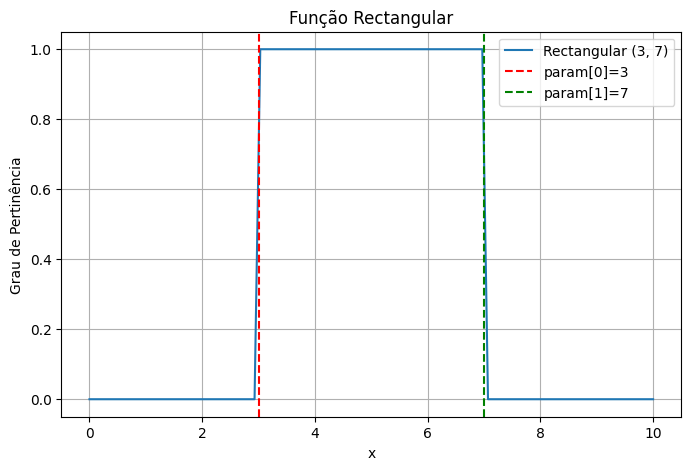

In [1774]:
# Exemplo de plotagem para a função Retangular
a, b = 3, 7  # Parâmetros da função Retangular
x = np.linspace(0, 10, 100)  # Valores de x no intervalo [0, 10]

# Calcula os graus de pertinência
y = [rectangular_function(val, a, b) for val in x]

# Plotando a função Retangular
plot_results(x, y, [a, b], "rectangular")

### 11. Função logarítmica

In [1775]:
def logarithmic_function(x, a, b):
    """
    Função de pertinência logarítmica.
    :param x: Valor de entrada.
    :param a: Base do logaritmo.
    :param b: Escala do logaritmo.
    :return: Grau de pertinência.
    """
    if x > 0:
        return min(1, max(0, b * np.log(x) / np.log(a)))
    return 0

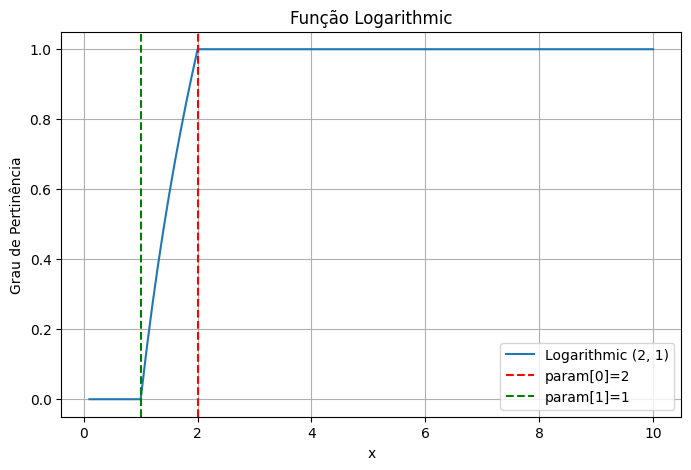

In [1776]:
# Exemplo de plotagem para a função Logarítmica
a, b = 2, 1  # Parâmetros da função Logarítmica
x = np.linspace(0.1, 10, 100)  # Valores de x no intervalo [0.1, 10] (evitando zero)

# Calcula os graus de pertinência
y = [logarithmic_function(val, a, b) for val in x]

# Plotando a função Logarítmica
plot_results(x, y, [a, b], "logarithmic")

### 12. Função Pi

In [1777]:
def pi_function(x, a, b, c):
    if x < b:
        return s_function(x, a, b)
    else:
        return z_function(x, b, c)

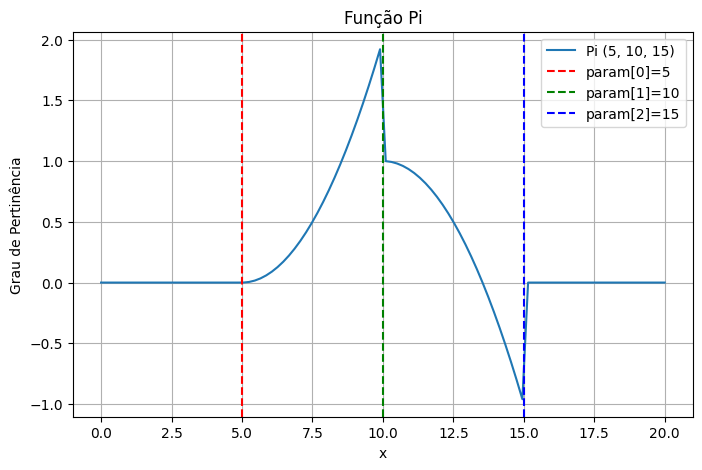

In [1778]:
# Exemplo de plotagem para a função Pi
a, b, c = 5, 10, 15  # Parâmetros da função Pi
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [pi_function(val, a, b, c) for val in x]

# Plotando a função Pi
plot_results(x, y, [a, b, c], "pi")

### 13. Função Singleton

In [1779]:
def singleton_function(x, c):
    """
    Função de pertinência Singleton.
    :param x: Valor de entrada.
    :param c: Ponto onde a pertinência é máxima (1).
    :return: Grau de pertinência.
    """
    return 1 if x == c else 0

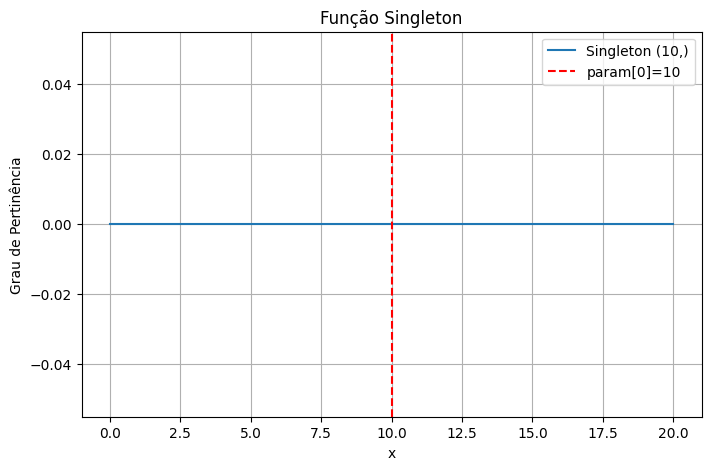

In [1780]:
# Exemplo de plotagem para a função Singleton
c = 10  # Parâmetro da função Singleton
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [singleton_function(val, c) for val in x]

# Plotando a função Singleton
plot_results(x, y, [c], "singleton")

### 14. Função Linear

In [1781]:
def linear_function(x, a, b):
    """
    Função de pertinência linear crescente ou decrescente.
    :param x: Valor de entrada.
    :param a: Início do intervalo.
    :param b: Fim do intervalo.
    :return: Grau de pertinência.
    """
    if x <= a:
        return 0
    elif x >= b:
        return 1
    else:
        return (x - a) / (b - a)

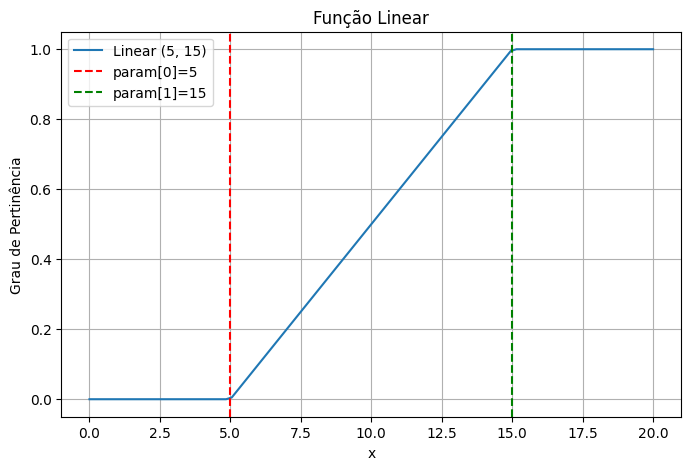

In [1782]:
# Exemplo de plotagem para a função Linear
a, b = 5, 15  # Parâmetros da função Linear
x = np.linspace(0, 20, 100)  # Valores de x no intervalo [0, 20]

# Calcula os graus de pertinência
y = [linear_function(val, a, b) for val in x]

# Plotando a função Linear
plot_results(x, y, [a, b], "linear")

### Garu de Pertinência

In [1783]:
### Função Membership
def calculate_membership(dominio, types, params):
    """
    Calcula os graus de pertinência para os valores em intervalos com base nos tipos e parâmetros fornecidos.

    :param dominio: Tupla (min, max) definindo o intervalo do domínio.
    :param types: Lista de strings indicando os tipos de funções de pertinência.
    :param params: Lista de listas com os parâmetros para cada função de pertinência.
    :return: Lista de listas com os graus de pertinência para cada tipo.
    """
    x = np.linspace(dominio[0], dominio[1], 100)  # Gera os valores de x no domínio
    results = []
    for func_type, func_params in zip(types, params):
        
        # Calcula os graus de pertinência com base no tipo de função
        if func_type == 'linear':
            results.append([linear_function(val, *func_params) for val in x])  
        elif func_type == 'triangular':
            results.append([triangular(val, *func_params) for val in x])
        elif func_type == 'trapezoidal':
            results.append([trapezoidal(val, *func_params) for val in x])
        elif func_type == 'gaussian':
            results.append([gaussian(val, *func_params) for val in x])
        elif func_type == 'sigmoidal':
            results.append([sigmoidal(val, *func_params) for val in x])
        elif func_type == 'z':
            results.append([z_function(val, *func_params) for val in x])
        elif func_type == 's':
            results.append([s_function(val, *func_params) for val in x])
        elif func_type == 'pi':
            results.append([pi_function(val, *func_params) for val in x])
        elif func_type == 'bell':
            results.append([bell_function(val, *func_params) for val in x])
        elif func_type == 'singleton':
            results.append([singleton_function(val, *func_params) for val in x])
        elif func_type == 'cauchy':
            results.append([cauchy_function(val, *func_params) for val in x])
        elif func_type == 'double_gaussian':
            results.append([double_gaussian(val, *func_params) for val in x])
        elif func_type == 'retangular':
            results.append([rectangular_function(val, *func_params) for val in x])
        elif func_type == 'logaritmica':
            results.append([logarithmic_function(val, *func_params) for val in x])
        else:
            raise ValueError(f"Tipo de função desconhecido: {func_type}")

    return x, results


## 1.2. Fuzzificação e Análise Comporativa

### Gera os Parametros

In [1784]:
def generate_params(X, types, n):
    """
    Gera os parâmetros para diferentes tipos de funções de pertinência.

    Args:
        X (tuple): Intervalo do domínio (mínimo, máximo).
        types (list): Lista de tipos de funções ('gaussian', 'triangular', etc.).
        n (int): Número de funções de pertinência.

    Returns:
        list: Lista de parâmetros para cada tipo de função.
    """
    centers = np.linspace(X[0], X[1], n)  # Centros uniformemente distribuídos
    step = (X[1] - X[0]) / (n - 1) if n > 1 else (X[1] - X[0])  # Espaçamento entre os centros
    params = []

    for i, t in enumerate(types):
        if t == 'gaussian':
            sigma = step / 2  # Sigma proporcional ao espaçamento
            params.append([centers[i], sigma])
        elif t == 'triangular':
            a = max(X[0], centers[i] - step)  # Início da base
            b = centers[i]                   # Pico
            c = min(X[1], centers[i] + step)  # Fim da base
            params.append([a, b, c])
        elif t == 'trapezoidal':
            a = max(X[0], centers[i] - step)  # Início da base
            b = max(X[0], centers[i] - step / 2)  # Início do topo
            c = min(X[1], centers[i] + step / 2)  # Fim do topo
            d = min(X[1], centers[i] + step)  # Fim da base
            params.append([a, b, c, d])
        elif t == 'sigmoidal':
            a = 1  # Inclinação padrão
            c = centers[i]  # Centro
            params.append([a, c])
        elif t == 'bell':
            a = step / 2  # Largura do sino
            b = 2  # Inclinação padrão
            c = centers[i]  # Centro
            params.append([a, b, c])
        elif t == 'z':
            a = max(X[0], centers[i] - step)  # Início do decaimento
            b = centers[i]  # Fim do decaimento
            params.append([a, b])
        elif t == 's':
            a = centers[i]  # Início do crescimento
            b = min(X[1], centers[i] + step)  # Fim do crescimento
            params.append([a, b])
        elif t == 'pi':
            a = max(X[0], centers[i] - step)  # Início do crescimento
            b = centers[i]  # Pico
            c = min(X[1], centers[i] + step)  # Fim do decaimento
            params.append([a, b, c])
        elif t == 'singleton':
            c = centers[i]  # Ponto único
            params.append([c])
        elif t == 'cauchy':
            c = centers[i]  # Centro
            gamma = step / 2  # Largura
            params.append([c, gamma])
        elif t == 'double_gaussian':
            c1 = max(X[0], centers[i] - step / 2)  # Centro da primeira gaussiana
            sigma1 = step / 4  # Largura da primeira gaussiana
            c2 = min(X[1], centers[i] + step / 2)  # Centro da segunda gaussiana
            sigma2 = step / 4  # Largura da segunda gaussiana
            params.append([c1, sigma1, c2, sigma2])
        elif t == 'retangular':
            a = max(X[0], centers[i] - step / 2)  # Início do intervalo
            b = min(X[1], centers[i] + step / 2)  # Fim do intervalo
            params.append([a, b])
        elif t == 'logaritmica':
            a = 2  # Base do logaritmo
            b = 1  # Escala
            params.append([a, b])
        else:
            raise ValueError(f"Tipo de função '{t}' não suportado!")
    
    return params

In [1785]:
def plot_membership(x, u, label):
    """
    Plota as funções de pertinência com base nos intervalos, resultados e classificações fornecidos.

    :param intervalos: Lista de tuplas (min, max) definindo os intervalos de cada função.
    :param results: Lista de listas com os graus de pertinência calculados.
    :param classificacao: Lista de nomes descritivos para cada função de pertinência.
    """
    plt.figure(figsize=(10, 6))

    for i, result in enumerate(u):
        plt.plot(x, result, label=f"{label[i]}")

    plt.legend()
    plt.title("Funções de Pertinência")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.grid()
    plt.show()

### Realiza os exemplos com os parametros manual

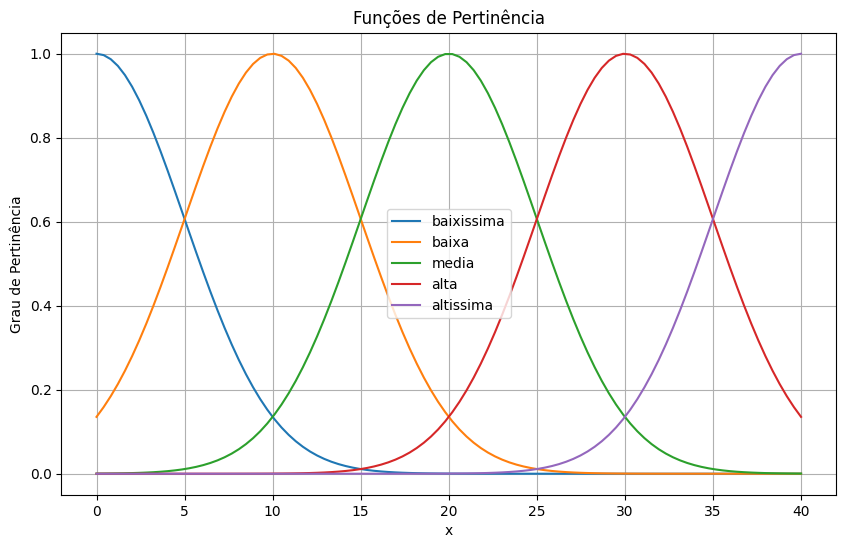

In [1786]:
# Definição do domínio
X = (0, 40) 

labels = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian']

# Parâmetros ajustados para a função gaussiana
params = [
    [0, 5],     # Centro no meio do intervalo (-10, 10), largura controlada por sigma
    [10, 5],    # Centro no meio do intervalo (0, 20), largura controlada por sigma
    [20, 5],    # Centro no meio do intervalo (10, 30), largura controlada por sigma
    [30, 5],    # Centro no meio do intervalo (20, 40), largura controlada por sigma
    [40, 5]     # Centro no meio do intervalo (30, 50), largura controlada por sigma
]

# Função para calcular os graus de pertinência
x, u = calculate_membership(X, types, params)
# print(x,u)
# Função para plotar os resultados
plot_membership(x, u, labels)

### Realiza os exemplos com os parametros automatico

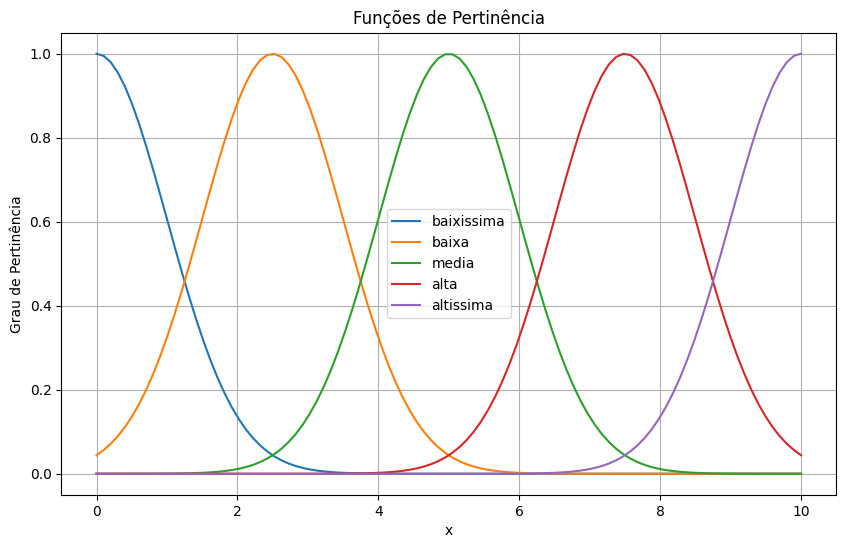

In [1787]:
import numpy as np

# Definição do intervalo e número de funções
X = (0, 10)  # Intervalo do domínio

labels = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'gaussian', 'gaussian', 'gaussian', 'gaussian']
n = len(types)       # Quantidade de funções de pertinência

# Cálculo dos centros e sigma
centers = np.linspace(X[0], X[1], n)  # Centros uniformemente distribuídos
sigma = (X[1] - X[0]) / (2 * n)       # Sigma proporcional ao espaçamento entre os centros

# Geração dos parâmetros
params = [[center, sigma] for center in centers]

# Função para calcular os graus de pertinência
x, u = calculate_membership(X, types, params)
# Função para plotar os resultados
plot_membership(x, u, labels)

### Realiza os exemplos com a função de parametros

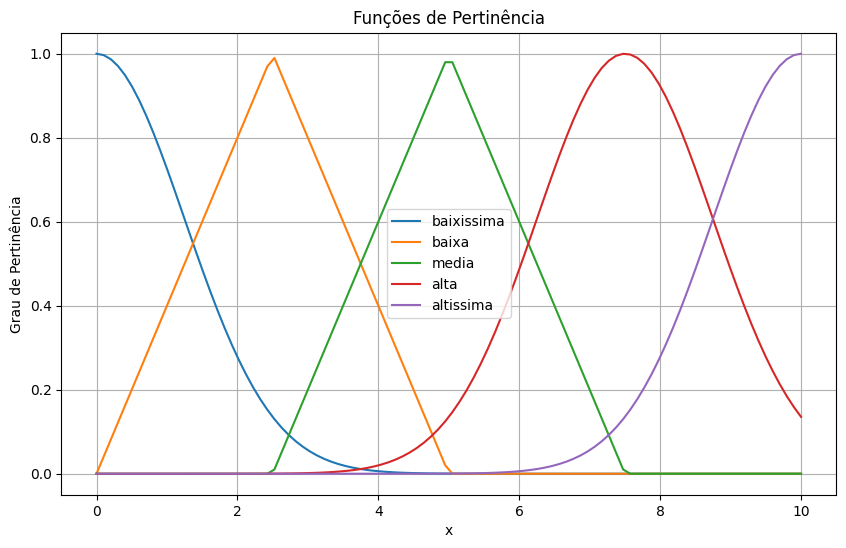

In [1788]:
import numpy as np

# Definição do intervalo e número de funções
X = (0, 10)  # Intervalo do domínio

labels = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types = ['gaussian', 'triangular', 'triangular', 'gaussian', 'gaussian']
n = len(types)       # Quantidade de funções de pertinência

# Geração dos parâmetros
params = generate_params(X, types, n)

# Função para calcular os graus de pertinência
x, u = calculate_membership(X, types, params)
# Função para plotar os resultados
plot_membership(x, u, labels)

### Exemplo Professor

In [1789]:
# Geração dos centros triangulares uniformemente distribuídos
n = 2  # número de atributos (variáveis de entrada)
npt = 1  # número de padrões de entrada
xt = [0.4, 0.75]  # Entrada a ser fuzzificada
m = [3, 4]  # número de funções de pertinência para cada atributo

xmin = [0, 0]  # mínimo de cada atributo
xmax = [1, 1]  # máximo de cada atributo

c = np.zeros((n, max(m)))  # Matriz para armazenar os centros

for i in range(n):
    step = (xmax[i] - xmin[i]) / (m[i] - 1)  # Cálculo do passo
    for j in range(m[i]):
        c[i, j] = xmin[i] + j * step  # Cálculo do centro

print("Centros triangulares uniformemente distribuídos:")
print(c)

Centros triangulares uniformemente distribuídos:
[[0.         0.5        1.         0.        ]
 [0.         0.33333333 0.66666667 1.        ]]


### Função com exemplos

In [1790]:
def plot_membership_with_samples(x, results, labels, samples, title, activations):
    """
    Plota funções de pertinência com destaque para amostras.

    :param x: Valores do domínio.
    :param results: Lista de listas com os graus de pertinência calculados.
    :param labels: Lista de rótulos para cada função de pertinência.
    :param samples: Lista de amostras a serem destacadas.
    :param title: Título do gráfico.
    :param activations: Lista de listas com os graus de ativação para cada amostra.
    """
    plt.figure(figsize=(10, 6))
    for j, sample in enumerate(samples):
            # Adiciona uma linha vertical para cada amostra
            random_color = np.random.rand(3,)
            plt.axvline(sample, color=random_color, linestyle='--', alpha=0.7, label=f"Sample: {sample}")
    for i, result in enumerate(results):
        # Plota a função de pertinência com o rótulo correspondente
        plt.plot(x, result, label=f"{labels[i]}")
        for j, sample in enumerate(samples):
           
            # Pega o grau de ativação correspondente
            activation = activations[i][j]
            # Adiciona um ponto no gráfico para destacar a ativação
            random_color = np.random.rand(3,)
            plt.scatter(sample, activation, color=random_color, 
                        label=f"Sample {sample}: {activation:.2f}")

    # Configurações do gráfico
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1), title="Funções Fuzzy")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'{output_dir}/{title.replace(" ", "_").lower()}_fuzzificado.png')
    plt.show()

### Construindo dois atributos

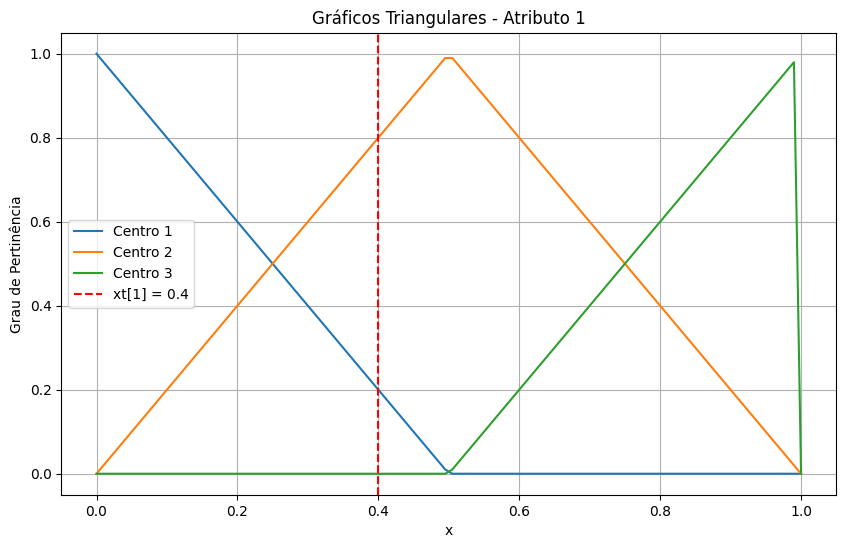

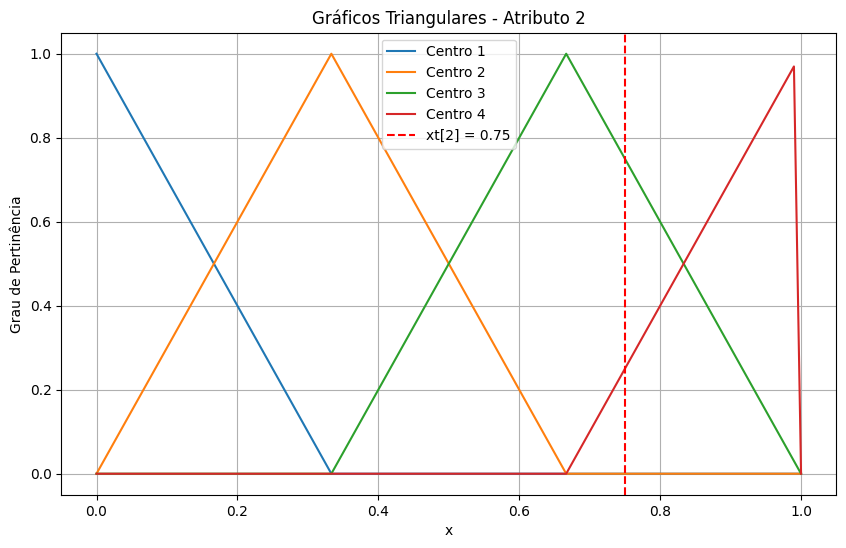

In [1791]:
# Plotando gráficos separados para cada atributo com destaque para xt
x = np.linspace(0, 1, 100)  # Domínio para os gráficos

for i in range(n):
    plt.figure(figsize=(10, 6))
    for j in range(m[i]):
        # Função triangular para cada centro
        a = c[i, j - 1] if j > 0 else xmin[i]
        b = c[i, j]
        c_val = c[i, j + 1] if j < m[i] - 1 else xmax[i]
        y = [triangular(val, a, b, c_val) for val in x]
        plt.plot(x, y, label=f"Centro {j + 1}")

    # Destacando o valor de xt no gráfico
    plt.axvline(xt[i], color='red', linestyle='--', label=f"xt[{i + 1}] = {xt[i]}")

    plt.title(f"Gráficos Triangulares - Atributo {i + 1}")
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid()
    plt.show()

### Fuzzificação e Analise Comparativa com duas funções de dois atributos


Ativações para o Atributo 1:
Samples: [15, 30]
  Função baixissima: ['0.48', '0.05']
  Função baixa: ['0.61', '0.79']
  Função media: ['0.00', '0.21']
  Função alta: ['0.00', '0.00']
  Função altissima: ['0.00', '0.00']


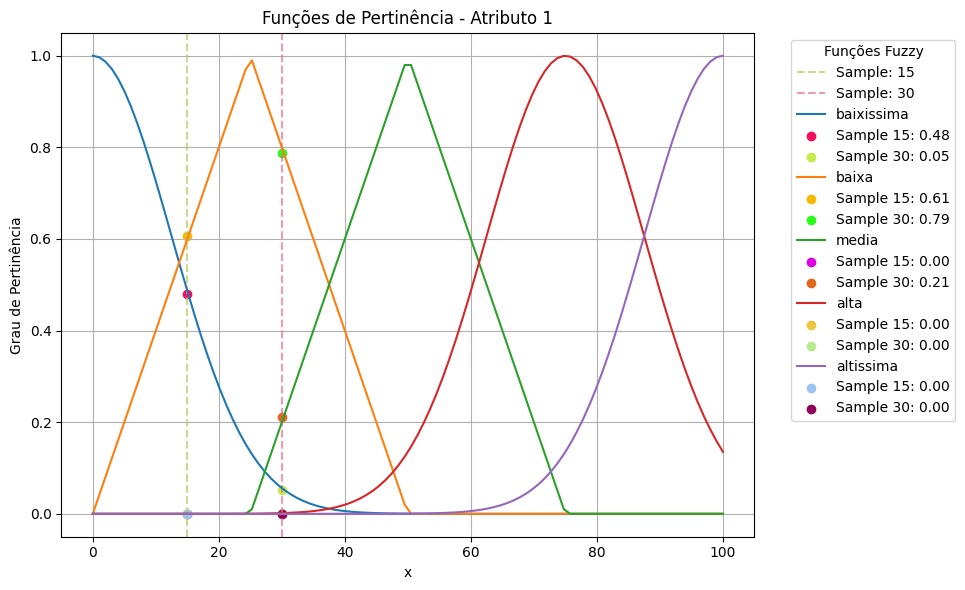


Ativações para o Atributo 2:
Samples: [10, 25]
  Função muito baixo: ['0.19', '0.00']
  Função baixo: ['1.00', '0.04']
  Função medio: ['0.06', '1.00']
  Função alto: ['0.00', '0.00']
  Função muito alto: ['0.00', '0.00']


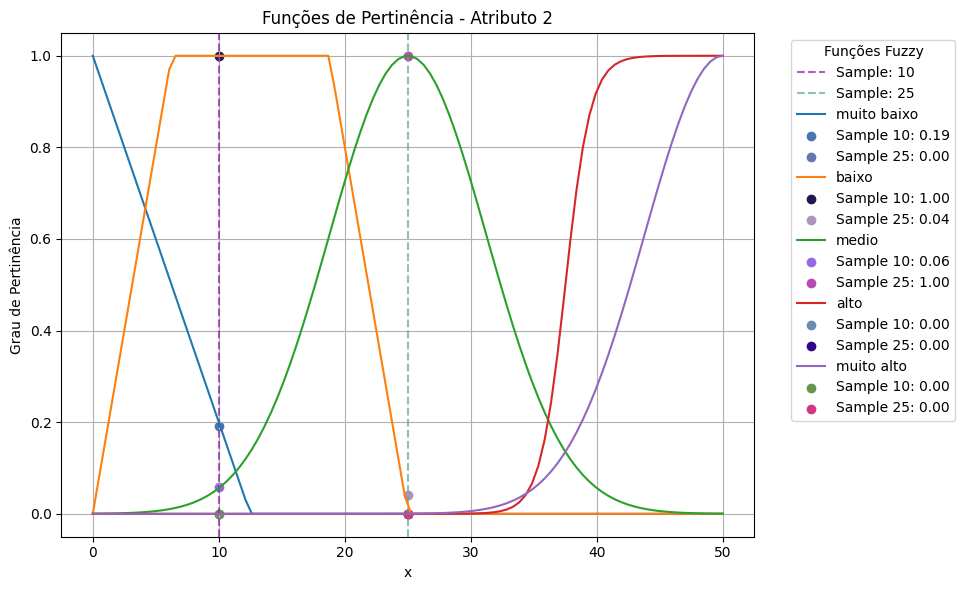

In [1792]:
# Definição do domínio e amostras para dois atributos
dominio1 = (0, 100)  # Intervalo do universo de discurso para o primeiro atributo
dominio2 = (0, 50)   # Intervalo do universo de discurso para o segundo atributo
samples1 = [15, 30]  # Amostras para fuzzificação do primeiro atributo
samples2 = [10, 25]  # Amostras para fuzzificação do segundo atributo

# Definição dos rótulos e tipos de funções de pertinência para cada atributo
labels1 = ['baixissima', 'baixa', 'media', 'alta', 'altissima']
types1 = ['gaussian', 'triangular', 'triangular', 'gaussian', 'gaussian']

labels2 = ['muito baixo', 'baixo', 'medio', 'alto', 'muito alto']
types2 = ['triangular', 'trapezoidal', 'gaussian', 'sigmoidal', 'gaussian']

# Número de funções de pertinência para cada atributo
n1 = len(types1)
n2 = len(types2)

# Geração dos parâmetros para cada tipo de função
params1 = generate_params(dominio1, types1, n1)
params2 = generate_params(dominio2, types2, n2)

# Cálculo dos graus de pertinência para cada atributo
x1, results1 = calculate_membership(dominio1, types1, params1)
x2, results2 = calculate_membership(dominio2, types2, params2)


# Cálculo do grau de ativação para cada amostra do primeiro atributo
activations1 = []
print("\nAtivações para o Atributo 1:")
print(f"Samples: {samples1}")
for i, result in enumerate(results1):
    sample_activations = []
    for sample in samples1:
        # Encontra o índice mais próximo do valor da amostra no domínio
        idx = np.abs(x1 - sample).argmin()
        activation = result[idx]
        sample_activations.append(activation)
    activations1.append(sample_activations)
    # Imprime as ativações formatadas
    formatted_activations = [f"{act:.2f}" for act in sample_activations]
    print(f"  Função {labels1[i]}: {formatted_activations}")

# Plotagem das funções de pertinência para o atributo 1 com as amostras
plot_membership_with_samples(
    x1, results1, labels1, samples1, "Funções de Pertinência - Atributo 1", activations1
)

# Cálculo do grau de ativação para cada amostra do segundo atributo
activations2 = []
print("\nAtivações para o Atributo 2:")
print(f"Samples: {samples2}")
for i, result in enumerate(results2):
    sample_activations = []
    for sample in samples2:
        # Encontra o índice mais próximo do valor da amostra no domínio
        idx = np.abs(x2 - sample).argmin()
        activation = result[idx]
        sample_activations.append(activation)
    activations2.append(sample_activations)
    # Imprime as ativações formatadas
    formatted_activations = [f"{act:.2f}" for act in sample_activations]
    print(f"  Função {labels2[i]}: {formatted_activations}")

# Plotagem das funções de pertinência para o atributo 2 com as amostras
plot_membership_with_samples(
    x2, results2, labels2, samples2, "Funções de Pertinência - Atributo 2", activations2
)


In [1793]:
def fuzzificacao(n, type, dominio, samples, labels):
    """
    Realiza a fuzzificação e plota as funções de pertinência com destaque para as amostras.

    :param n: Número de funções de pertinência.
    :param type: Tipo de função de pertinência.
    :param dominio: Intervalo do domínio (mínimo, máximo).
    :param samples: Lista de amostras a serem destacadas.
    :param labels: Lista de rótulos para cada função de pertinência.
    """
    # Número de funções de pertinência para cada atributo
    types = [type] * n

    # Geração dos parâmetros para cada tipo de função
    params = generate_params(dominio, types, n)

    # Cálculo dos graus de pertinência para cada atributo
    x, results = calculate_membership(dominio, types, params)

    # Cálculo do grau de ativação para cada amostra
    activations = []
    for i, result in enumerate(results):
        sample_activations = []
        for sample in samples:
            # Encontra o índice mais próximo do valor da amostra no domínio
            idx = np.abs(x - sample).argmin()
            activation = result[idx]
            sample_activations.append(activation)
        activations.append(sample_activations)

    # Imprime as ativações calculadas com melhor formatação
    print(f"\nAtivações para o tipo {type}:")
    print(f"Samples: {samples}")
    for i, sample_activations in enumerate(activations):
         # Arredonda os valores para duas casas decimais
        rounded_activations = np.round(sample_activations, 2)
        print(f"{labels[i]}: {rounded_activations.tolist()}")

    # Plotagem das funções de pertinência para o atributo com as amostras
    plot_membership_with_samples(
        x, results, labels, samples, f"Funções de Pertinência - {type}", activations
    )


Ativações para o tipo triangular:
Samples: [25, 75]
label_0: [0.24, 0.0]
label_1: [0.76, 0.0]
label_2: [0.0, 0.76]
label_3: [0.0, 0.24]


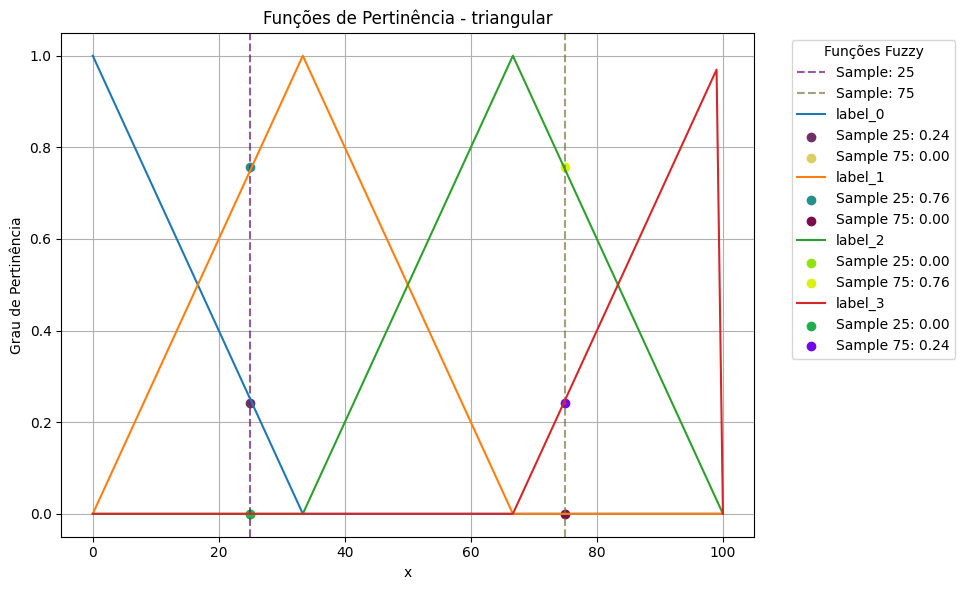


Ativações para o tipo trapezoidal:
Samples: [25, 75]
label_0: [0.48, 0.0]
label_1: [1, 0]
label_2: [0, 1]
label_3: [0.0, 0.48]


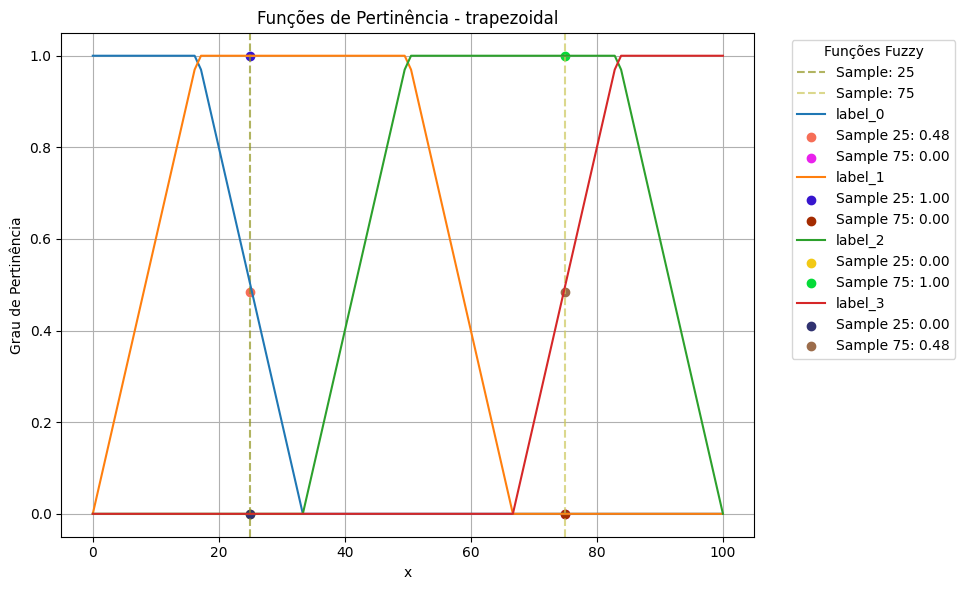


Ativações para o tipo gaussian:
Samples: [25, 75]
label_0: [0.32, 0.0]
label_1: [0.89, 0.05]
label_2: [0.05, 0.89]
label_3: [0.0, 0.32]


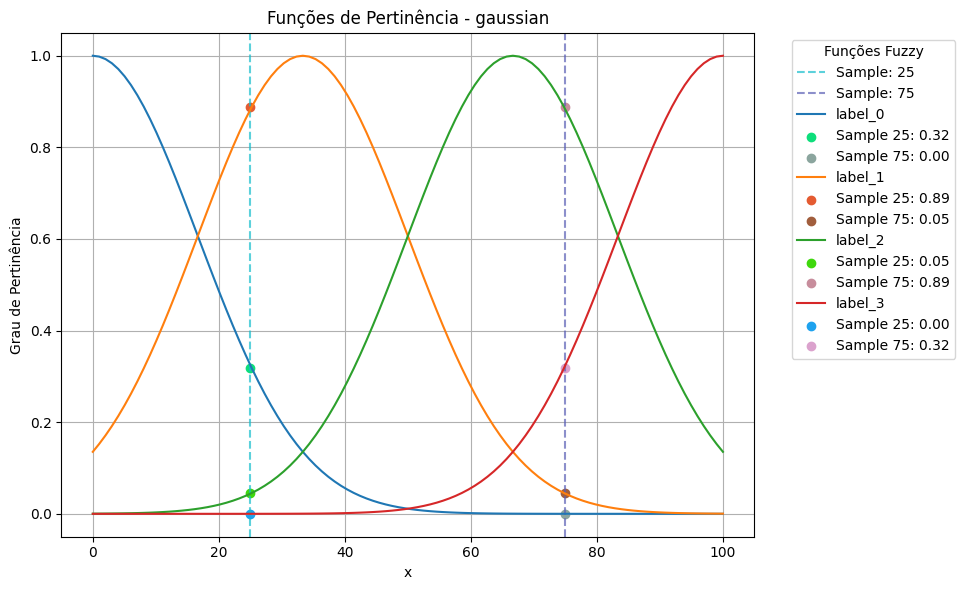


Ativações para o tipo sigmoidal:
Samples: [25, 75]
label_0: [1.0, 1.0]
label_1: [0.0, 1.0]
label_2: [0.0, 1.0]
label_3: [0.0, 0.0]


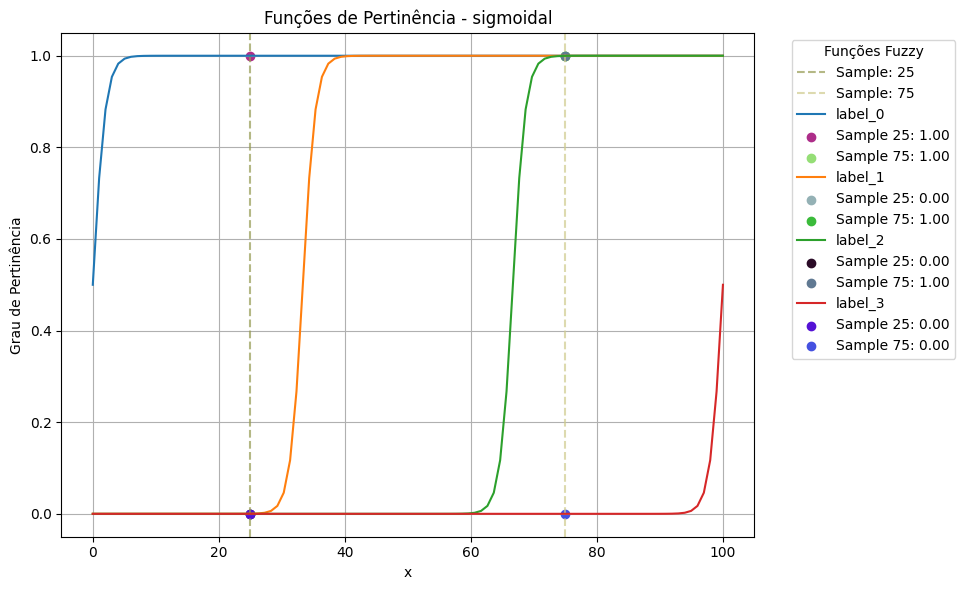


Ativações para o tipo bell:
Samples: [25, 75]
label_0: [0.16, 0.0]
label_1: [0.95, 0.03]
label_2: [0.03, 0.95]
label_3: [0.0, 0.16]


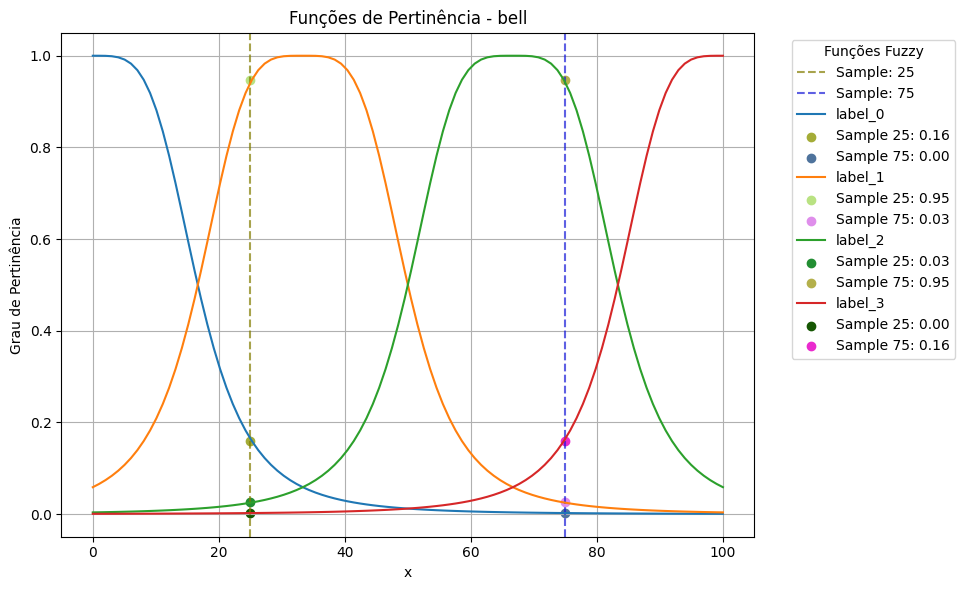


Ativações para o tipo s:
Samples: [25, 75]
label_0: [1.15, 1.0]
label_1: [0, 1]
label_2: [0.0, 0.12]
label_3: [0, 0]


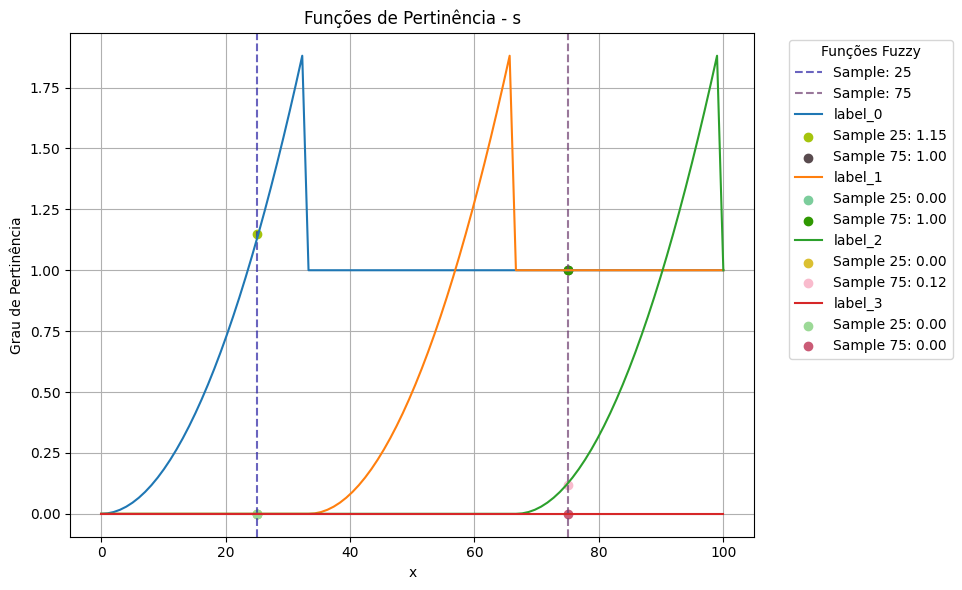


Ativações para o tipo z:
Samples: [25, 75]
label_0: [0, 0]
label_1: [-0.15, 0.0]
label_2: [1, 0]
label_3: [1.0, 0.88]


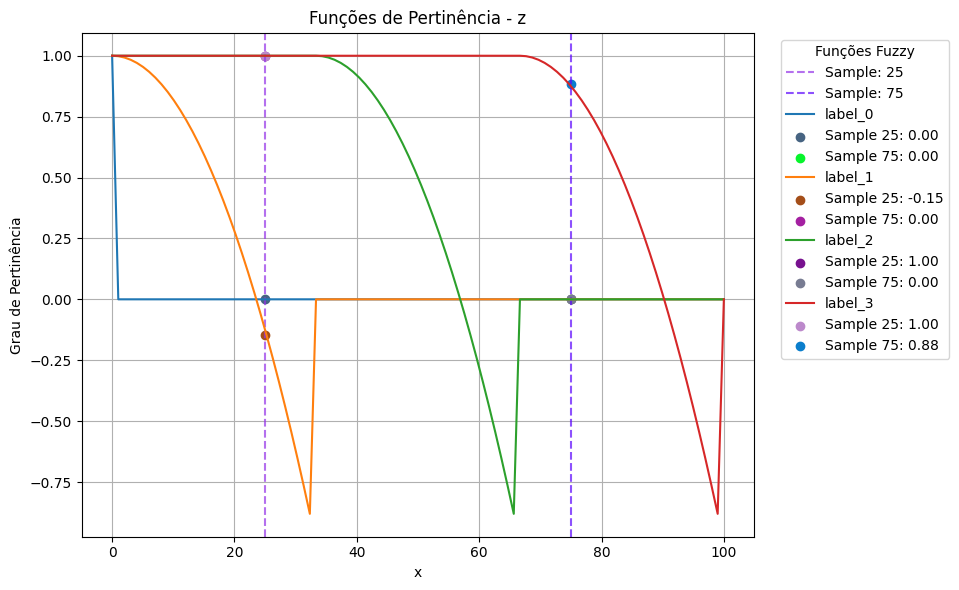


Ativações para o tipo pi:
Samples: [25, 75]
label_0: [-0.15, 0.0]
label_1: [1.15, 0.0]
label_2: [0.0, 0.88]
label_3: [0.0, 0.12]


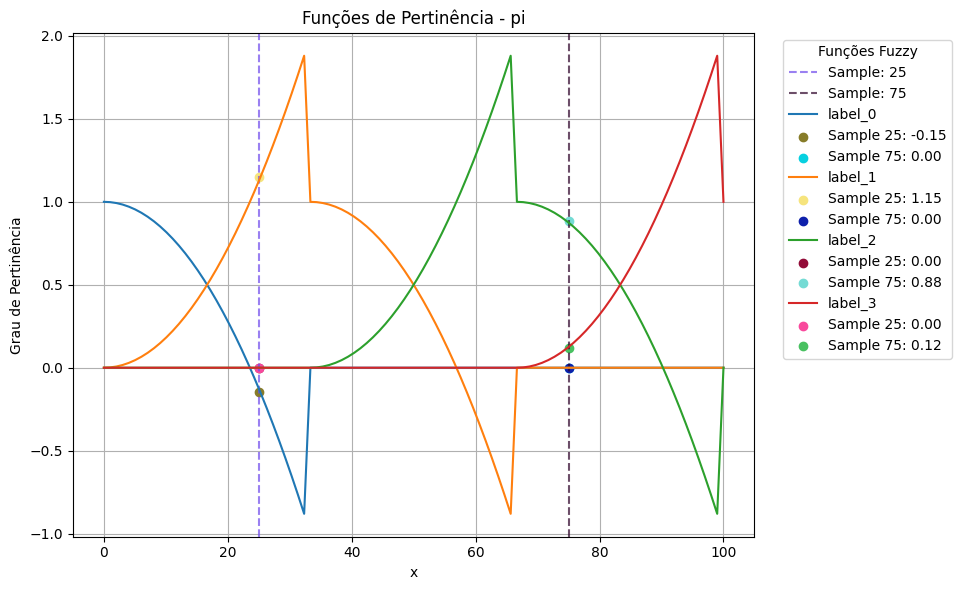


Ativações para o tipo singleton:
Samples: [25, 75]
label_0: [0, 0]
label_1: [0, 0]
label_2: [0, 0]
label_3: [0, 0]


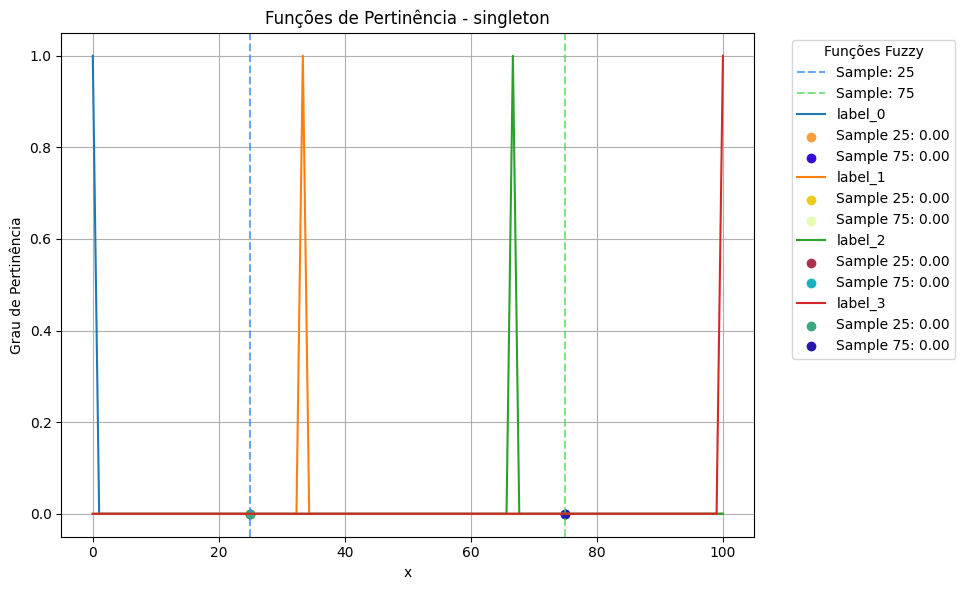


Ativações para o tipo cauchy:
Samples: [25, 75]
label_0: [0.3, 0.05]
label_1: [0.81, 0.14]
label_2: [0.14, 0.81]
label_3: [0.05, 0.3]


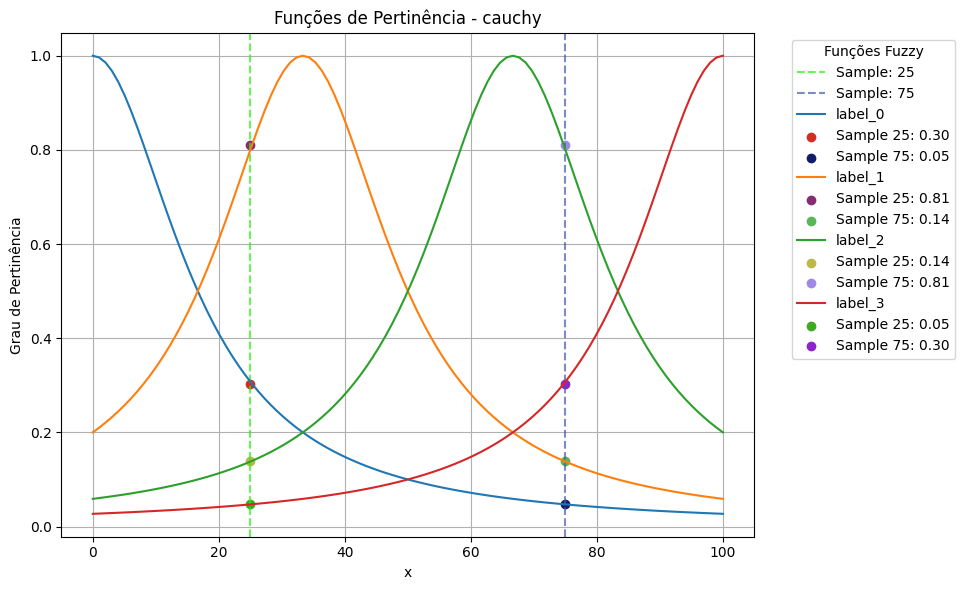


Ativações para o tipo double_gaussian:
Samples: [25, 75]
label_0: [0.59, 0.0]
label_1: [0.59, 0.01]
label_2: [0.01, 0.59]
label_3: [0.0, 0.59]


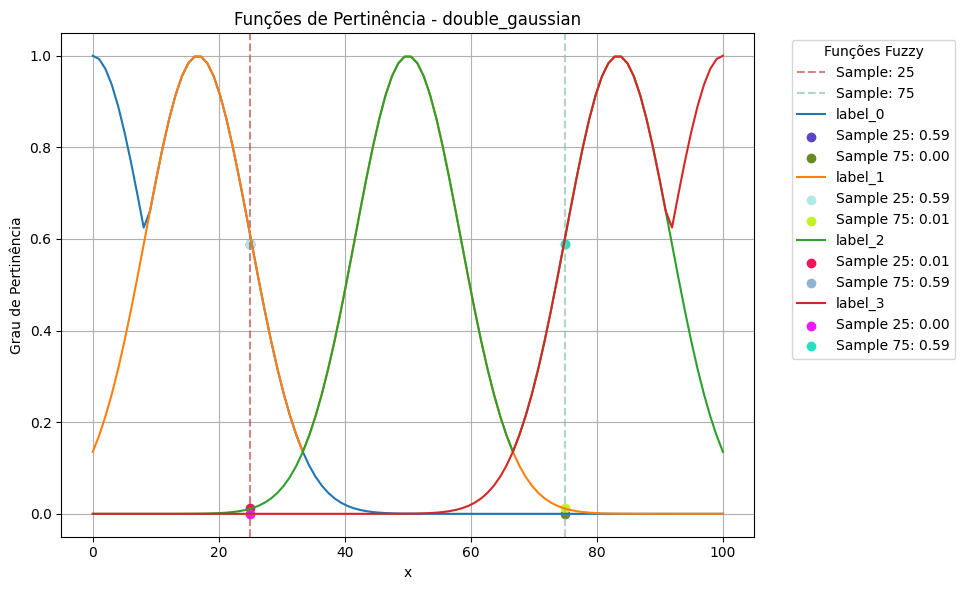


Ativações para o tipo retangular:
Samples: [25, 75]
label_0: [0, 0]
label_1: [1, 0]
label_2: [0, 1]
label_3: [0, 0]


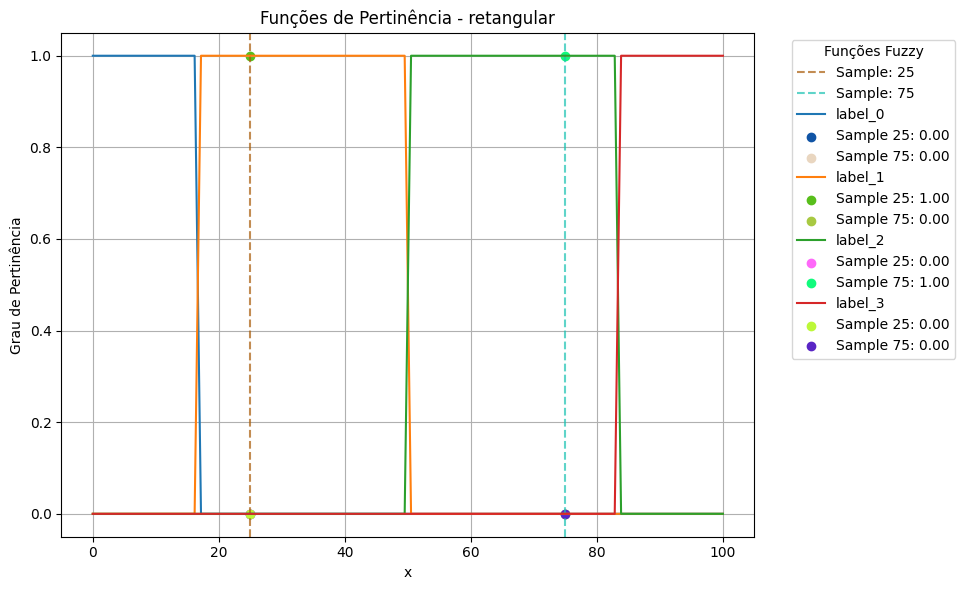


Ativações para o tipo logaritmica:
Samples: [25, 75]
label_0: [1, 1]
label_1: [1, 1]
label_2: [1, 1]
label_3: [1, 1]


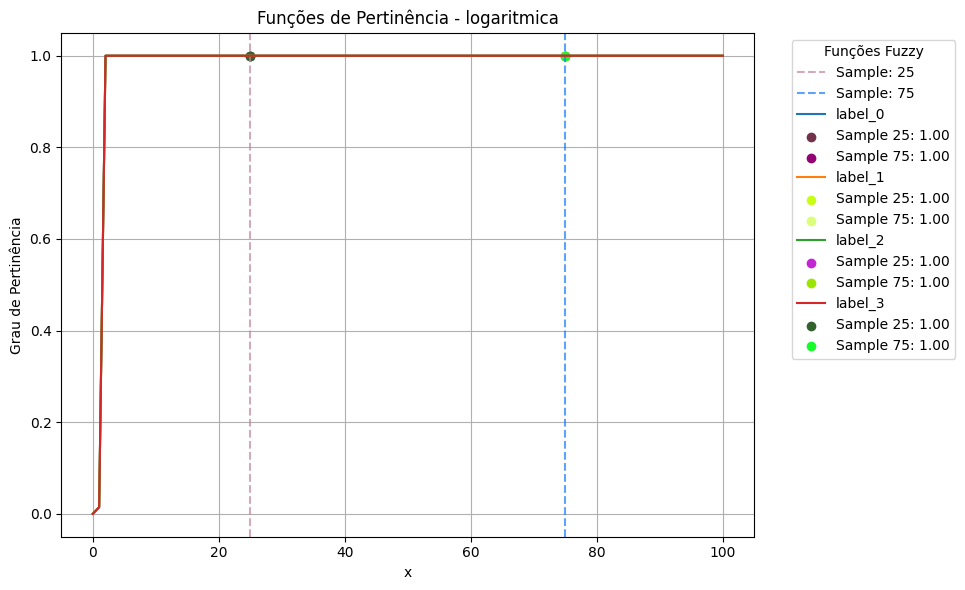

In [1794]:
# Definição do universo de discurso
dominio = (0, 100)  # Intervalo do universo de discurso
samples = [25, 75]  # Amostras para fuzzificação
n = 4
funcao_pertinecia = [
    'triangular', 'trapezoidal', 'gaussian', 'sigmoidal', 'bell', 's', 'z', 'pi', 'singleton', 'cauchy', 'double_gaussian', 'retangular', 'logaritmica'
]


for type in funcao_pertinecia:
    
    fuzzificacao(n, type  , dominio, samples, [f'label_{i}' for i in range(n)])



# Operações Básicas no Contexto Fuzzy

## Complemento

### Zadeh

In [1795]:
def complemento_zadeh(u):
    return 1 - np.array(u)

### Sugeno

In [1796]:
def complemento_sugeno(u, lamb=0.5):
    return (1 - u) / (1 + lamb * u)

### Yager

In [1797]:
def complemento_yager(u, w=2):
    return (1 - u**w)**(1/w)

## União (t-conormas)

### Máximo:

In [1798]:
def uniao_maximo(u1, u2):
    return np.maximum(u1, u2)

### Soma Probabilística:

In [1799]:
def uniao_soma_probabilistica(u1, u2):
    return u1 + u2 - u1 * u2

### Soma Limitada:

In [1800]:
def uniao_soma_limitada(u1, u2):
    return np.minimum(1, u1 + u2)

### Soma Drástica:

In [1801]:
def uniao_soma_drastica(u1, u2):
    return np.where((u1 == 0) & (u2 == 0), 0, np.maximum(u1, u2))

## Interseção (t-normas)

### Mínimo

In [1802]:
def intersecao_minimo(u1, u2):
    return np.minimum(u1, u2)

### Produto

In [1803]:
def intersecao_produto(u1, u2):
    return u1 * u2

### Produto Limitado:

In [1804]:
def intersecao_produto_limitado(u1, u2):
    return np.maximum(0, u1 + u2 - 1)

### Produto Drástico:

In [1805]:
def intersecao_produto_drastico(u1, u2):
    return np.where((u1 == 1) & (u2 == 1), np.minimum(u1, u2), 0)

## Analise Gráfica e textual

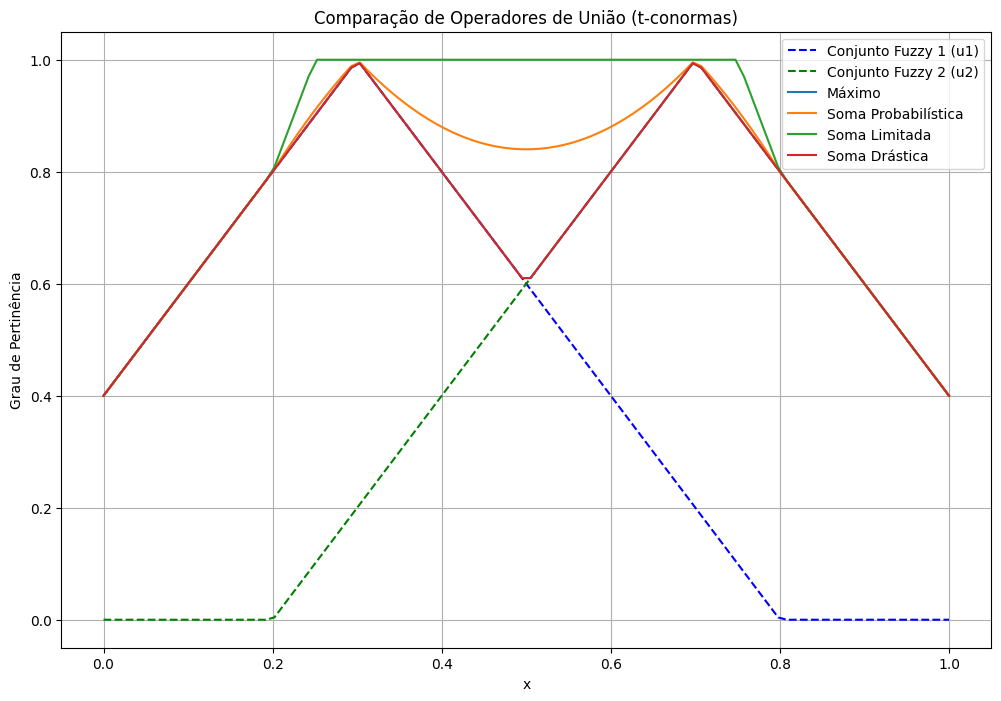

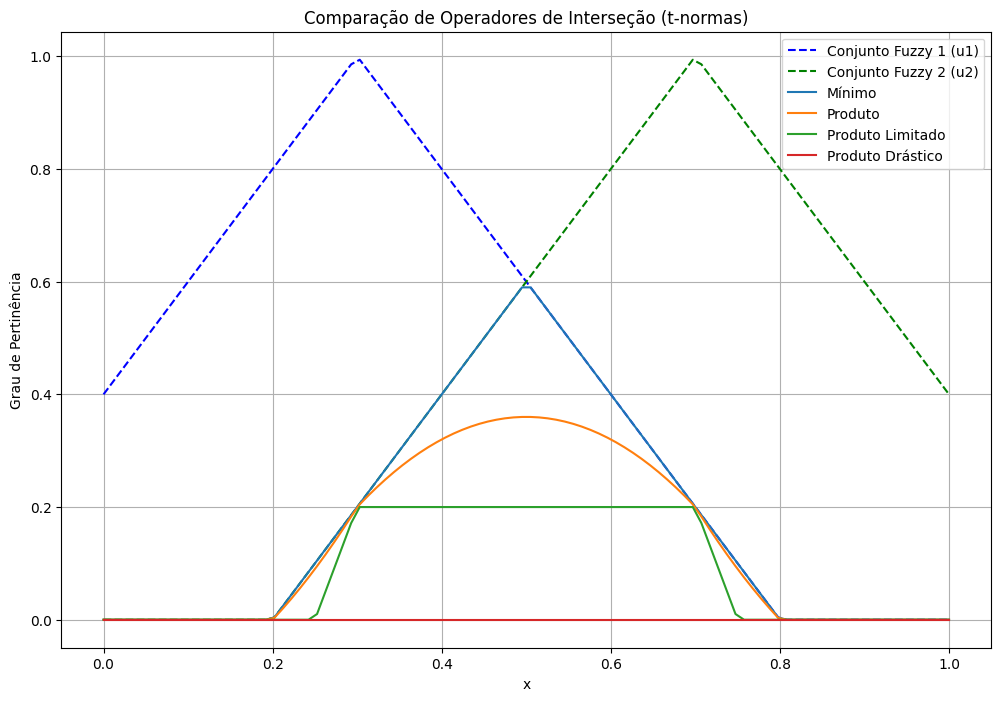

In [1806]:
# Conjuntos fuzzy criados anteriormente
x = np.linspace(0, 1, 100)
u1 = np.maximum(0, 1 - 2 * abs(x - 0.3))  # Conjunto fuzzy triangular centrado em 0.3
u2 = np.maximum(0, 1 - 2 * abs(x - 0.7))  # Conjunto fuzzy triangular centrado em 0.7


# Aplicação dos operadores
operadores_uniao = {
    "Máximo": uniao_maximo(u1, u2),
    "Soma Probabilística": uniao_soma_probabilistica(u1, u2),
    "Soma Limitada": uniao_soma_limitada(u1, u2),
    "Soma Drástica": uniao_soma_drastica(u1, u2),
}

operadores_intersecao = {
    "Mínimo": intersecao_minimo(u1, u2),
    "Produto": intersecao_produto(u1, u2),
    "Produto Limitado": intersecao_produto_limitado(u1, u2),
    "Produto Drástico": intersecao_produto_drastico(u1, u2),
}

# Função para plotar os operadores
def plot_operadores(x, u1, u2, operadores, titulo):
    plt.figure(figsize=(12, 8))
    plt.plot(x, u1, label="Conjunto Fuzzy 1 (u1)", linestyle="--", color="blue")
    plt.plot(x, u2, label="Conjunto Fuzzy 2 (u2)", linestyle="--", color="green")
    for nome, resultado in operadores.items():
        plt.plot(x, resultado, label=nome)
    plt.title(titulo)
    plt.xlabel("x")
    plt.ylabel("Grau de Pertinência")
    plt.legend()
    plt.grid()
    plt.show()

# Plotando os operadores de união
plot_operadores(x, u1, u2, operadores_uniao, "Comparação de Operadores de União (t-conormas)")

# Plotando os operadores de interseção
plot_operadores(x, u1, u2, operadores_intersecao, "Comparação de Operadores de Interseção (t-normas)")


# Relações Fuzzy

## Matriz de Relação Fuzzy

In [1807]:
import numpy as np
import matplotlib.pyplot as plt

# Operadores t-norma
def tnorm_min(a, b):
    return np.minimum(a, b)

def tnorm_prod(a, b):
    return a * b

# Operadores s-norma
def snorm_max(a, b):
    return np.maximum(a, b)

def snorm_prob(a, b):
    return a + b - a * b

# Função para calcular a matriz de relação fuzzy
def matriz_relacao_fuzzy(A, B, operador):
    m, n = len(A), len(B)
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = operador(A[i], B[j])
    return R

# Exemplos de conjuntos fuzzy
A = np.array([0.1, 0.5, 0.8, 1.0])
B = np.array([0.2, 0.4, 0.7, 0.9])

# Matrizes de relação fuzzy usando t-normas
R_min = matriz_relacao_fuzzy(A, B, tnorm_min)
R_prod = matriz_relacao_fuzzy(A, B, tnorm_prod)

# Matrizes de relação fuzzy usando s-normas
R_max = matriz_relacao_fuzzy(A, B, snorm_max)
R_prob = matriz_relacao_fuzzy(A, B, snorm_prob)

# Exibindo os valores das matrizes
print("Matriz T-norma (Mínimo):")
print(R_min)

print("\nMatriz T-norma (Produto):")
print(R_prod)

print("\nMatriz S-norma (Máximo):")
print(R_max)

print("\nMatriz S-norma (Soma Probabilística):")
print(R_prob)

# Análise comparativa
print("Análise comparativa das matrizes de relação fuzzy:")
print("T-norma mínimo gera valores mais conservadores (menores), refletindo interseção forte.")
print("T-norma produto suaviza a relação, permitindo valores intermediários.")
print("S-norma máximo destaca a união dos conjuntos, sempre puxando para o maior grau.")
print("S-norma soma probabilística também reflete união, mas com suavização, nunca ultrapassando 1.")

Matriz T-norma (Mínimo):
[[0.1 0.1 0.1 0.1]
 [0.2 0.4 0.5 0.5]
 [0.2 0.4 0.7 0.8]
 [0.2 0.4 0.7 0.9]]

Matriz T-norma (Produto):
[[0.02 0.04 0.07 0.09]
 [0.1  0.2  0.35 0.45]
 [0.16 0.32 0.56 0.72]
 [0.2  0.4  0.7  0.9 ]]

Matriz S-norma (Máximo):
[[0.2 0.4 0.7 0.9]
 [0.5 0.5 0.7 0.9]
 [0.8 0.8 0.8 0.9]
 [1.  1.  1.  1. ]]

Matriz S-norma (Soma Probabilística):
[[0.28 0.46 0.73 0.91]
 [0.6  0.7  0.85 0.95]
 [0.84 0.88 0.94 0.98]
 [1.   1.   1.   1.  ]]
Análise comparativa das matrizes de relação fuzzy:
T-norma mínimo gera valores mais conservadores (menores), refletindo interseção forte.
T-norma produto suaviza a relação, permitindo valores intermediários.
S-norma máximo destaca a união dos conjuntos, sempre puxando para o maior grau.
S-norma soma probabilística também reflete união, mas com suavização, nunca ultrapassando 1.


# Composição de Relação Fuzzy

In [1808]:
import numpy as np

# Função Máximo-Mínimo
def maximo_minimo(A, B):
    m, n = A.shape[0], B.shape[1]
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = np.max(np.minimum(A[i, :], B[:, j]))
    return R

# Função Mínimo-Máximo
def minimo_maximo(A, B):
    m, n = A.shape[0], B.shape[1]
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = np.min(np.maximum(A[i, :], B[:, j]))
    return R

# Função Máximo-Produto
def maximo_produto(A, B):
    m, n = A.shape[0], B.shape[1]
    R = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            R[i, j] = np.max(A[i, :] * B[:, j])
    return R

# Exemplos de matrizes fuzzy
A = np.array([[0.1, 0.5, 0.8], [0.2, 0.6, 0.9], [0.3, 0.7, 1.0]])
B = np.array([[0.2, 0.4, 0.7], [0.3, 0.5, 0.8], [0.4, 0.6, 0.9]])

# Aplicação das composições
R_max_min = maximo_minimo(A, B)
R_min_max = minimo_maximo(A, B)
R_max_prod = maximo_produto(A, B)

# Exibindo os valores das matrizes
print("Matriz Máximo-Mínimo:")
print(R_max_min.round(2))

print("\nMatriz Mínimo-Máximo:")
print(R_min_max.round(2))

print("\nMatriz Máximo-Produto:")
print(R_max_prod.round(2))

# Análise comparativa
print("\nAnálise comparativa das composições de relação fuzzy:")
print("Máximo-Mínimo: Reflete a interseção mais conservadora entre os conjuntos.")
print("Mínimo-Máximo: Reflete a união mais conservadora entre os conjuntos.")
print("Máximo-Produto: Permite suavização, considerando o produto dos graus de pertinência.")

Matriz Máximo-Mínimo:
[[0.4 0.6 0.8]
 [0.4 0.6 0.9]
 [0.4 0.6 0.9]]

Matriz Mínimo-Máximo:
[[0.2 0.4 0.7]
 [0.2 0.4 0.7]
 [0.3 0.4 0.7]]

Matriz Máximo-Produto:
[[0.32 0.48 0.72]
 [0.36 0.54 0.81]
 [0.4  0.6  0.9 ]]

Análise comparativa das composições de relação fuzzy:
Máximo-Mínimo: Reflete a interseção mais conservadora entre os conjuntos.
Mínimo-Máximo: Reflete a união mais conservadora entre os conjuntos.
Máximo-Produto: Permite suavização, considerando o produto dos graus de pertinência.
